In [3]:
import tensorflow as tf
import sys
sys.path.append('../models/stylegan2')
import dnnlib
import dnnlib.tflib as tflib
from run_generator import generate_images
import pretrained_networks
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from os.path import join as oj
import pickle as pkl
IMAGES_DIR = '../data/annotation-dataset-stylegan2/images'
GENERATING_LATENTS_DIR = '../data/annotation-dataset-stylegan2/data'

# generate a random image

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...


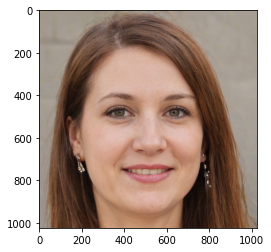

In [4]:
network_pkl = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'
truncation_psi = 0.5


# load the networks
print('Loading networks from "%s"...' % network_pkl)
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)
Gs_kwargs = dnnlib.EasyDict()
Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_kwargs.randomize_noise = False
if truncation_psi is not None:
    Gs_kwargs.truncation_psi = truncation_psi

# generate random z
seed = 0
rnd = np.random.RandomState(seed)
z = rnd.randn(1, *Gs.input_shape[1:]) # [minibatch, component]

# generate w
'''
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
w = {var: rnd.randn(*var.shape.as_list()) for var in noise_vars}
tflib.set_vars(w) # [height, width]
'''

# generate imate
images = Gs.run(z, None, **Gs_kwargs) # [minibatch, height, width, channel]
# PIL.Image.fromarray(images[0], 'RGB').save(dnnlib.make_run_dir_path('seed%04d.png' % seed))
plt.imshow(images[0])
plt.show()

In [8]:
z.shape # need to get z of shape (1, 512)
images = Gs.run(z, None, **Gs_kwargs) # [minibatch, height, width, channel], height=1024, width=1024
images.shape

(1, 1024, 1024, 3)